### Loading in the dataset  

In [1]:
import keras

from keras.datasets import imdb # IMDB datasets

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # Loads the data
print(train_data[0])

17465344/17464789 [==============================] - 11s 1us/step


c:\users\m shafay amjad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


c:\users\m shafay amjad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Shape for the datasets

In [5]:
train_data.shape, test_data.shape

((25000,), (25000,))

#### Verifying the max sequence

In [8]:
max([max(sequence) for sequence in train_data])

9999

#### Encoding the reviews back to english

In [9]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [14]:
len(train_data[0])

218

In [12]:
decoded_review # The first line review was actually this 

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### Preprating the data

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension)) # Sequence * dimention matrix (because the dimension is number of words )
    # The number of zeroes would be the matrix which we require to fill
    # For each of the sequence set the each row with the sequence index
    # and the values to be the 1 which sets the sequence to be true(where the sequenceis required else fasle))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data) # Vectorization of the training sequence 
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [16]:
x_train[0] # This will show you a single array matrix with 0's and 1's

array([0., 1., 1., ..., 0., 0., 0.])

#### Changing type of your train and testing labels

In [17]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building our network 

In [34]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses, metrics 
# should have used imports in a single line....
model = models.Sequential() # Sequential model 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # input Layer 
model.add(layers.Dense(16, activation='relu')) # Hidden Layer 
model.add(layers.Dense(16, activation='relu')) # Hidden Layer 
model.add(layers.Dense(8, activation='relu')) # Hidden Layer 
model.add(layers.Dense(1, activation='sigmoid')) # Output Layer 
"""
we need to pick a loss function and an optimizer. Since we are facing a binary classification problem and 
the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation),
is it best to use the binary_crossentropy loss. It isn't the only viable choice: you could use, for instance, 
mean_squared_error. But crossentropy is usually the best choice when you are dealing with models that output
probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the "distance"
between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the rmsprop optimizer and the binary_crossentropy loss function.
Note that we will also monitor accuracy during training.

"""
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# 

model.compile(optimizer=optimizers.RMSprop(lr=0.001), # or you can specify string 'rmspop'
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])



### Validation our approach 

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5779 - accuracy: 0.7792 - val_loss: 0.4660 - val_accuracy: 0.8407
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3569 - accuracy: 0.8951 - val_loss: 0.3250 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2434 - accuracy: 0.9237 - val_loss: 0.3240 - val_accuracy: 0.8706
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1863 - accuracy: 0.9386 - val_loss: 0.3276 - val_accuracy: 0.8687
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1473 - accuracy: 0.9522 - val_loss: 0.2831 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1224 - accuracy: 0.9600 - val_loss: 0.3114 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1014 - accuracy: 0.9678 - val_loss: 0.3173 - val_accuracy: 0.8837
Epoch 8/20
30

#### Performance Check

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

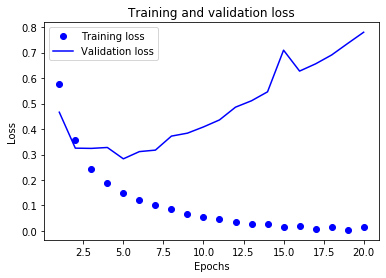

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

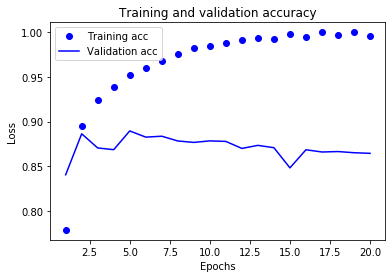

In [39]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()